In [41]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import main

In [42]:
DIRECTORY_PATH = "/largedisk/julius_w/Development/conc2RDF/training_data"
new_dataset = main.DataDir(DIRECTORY_PATH)
new_dataset.get_relevant_files()
new_dataset.extract_data()
device = "cuda"

In [43]:
class NeuralNetwork(nn.Module):
    def __init__(self, dataset):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, dataset.num_points),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [44]:
model = torch.load("model.pth", weights_only=False)

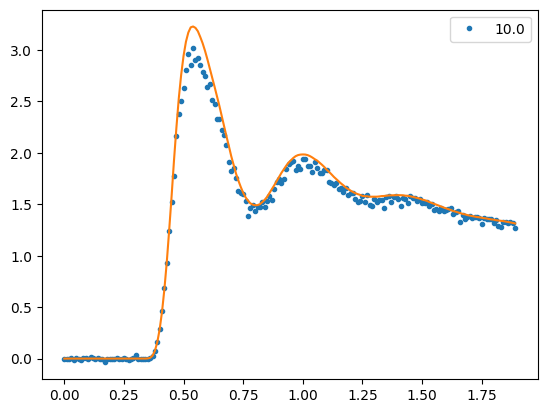

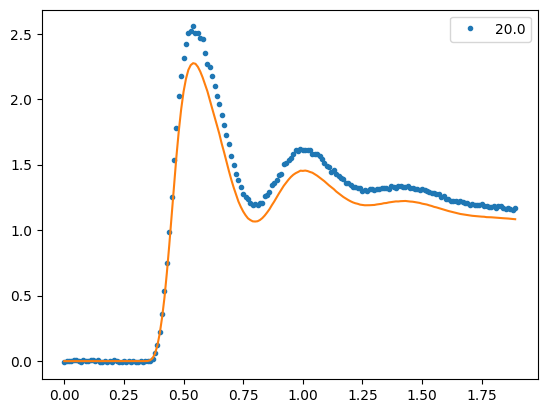

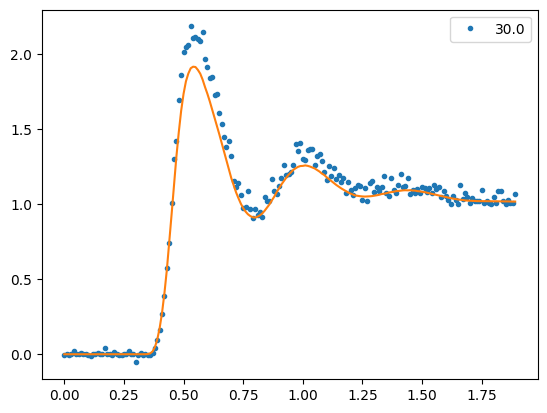

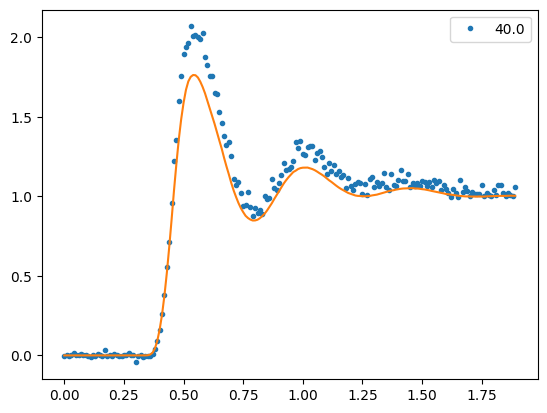

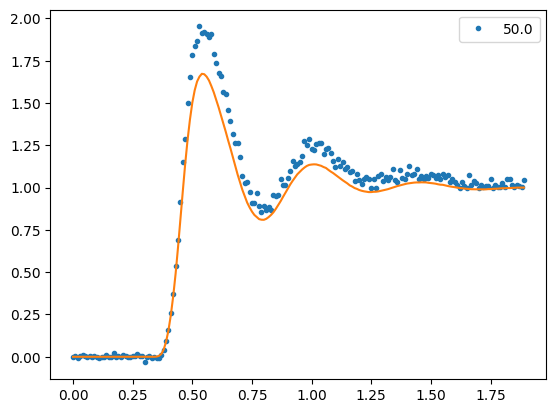

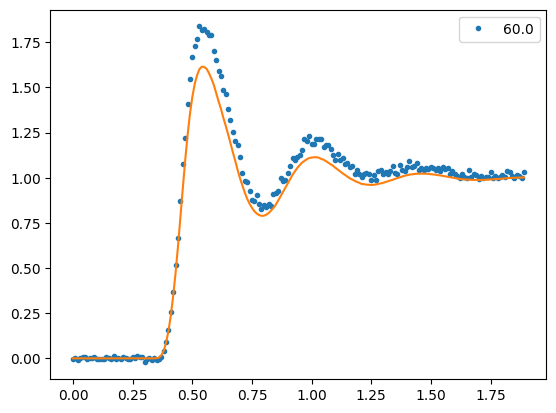

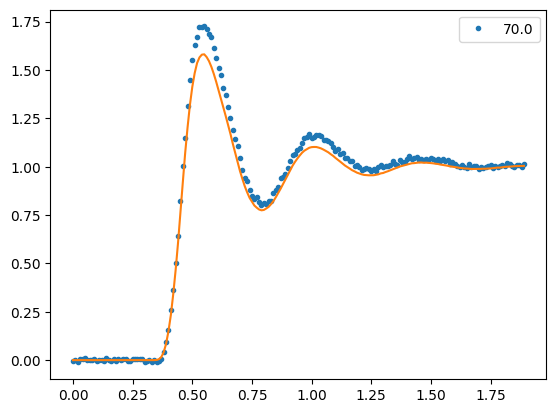

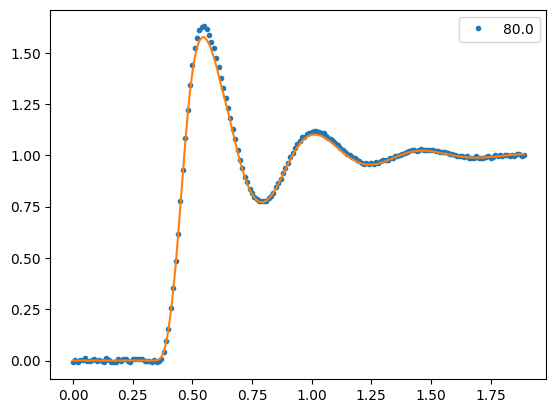

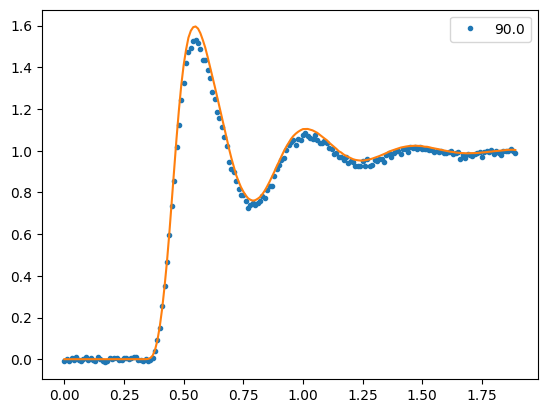

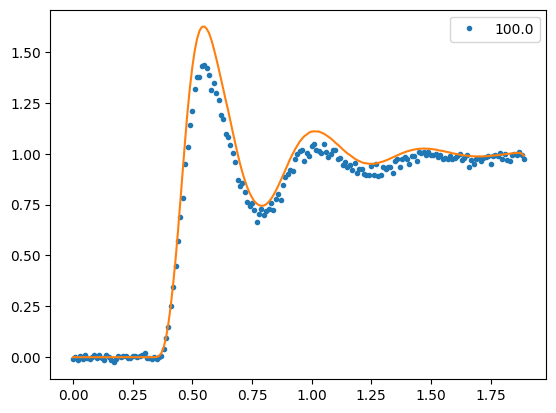

In [45]:
model.eval()
with torch.no_grad():
    for i in range(10):
        X = torch.tensor([new_dataset.data[i, 0]]).to(device)
        pred = model(X).cpu()
        plt.plot(new_dataset.r_values, pred, "o", ms=3, label=f"{X.item()}")
        plt.plot(new_dataset.r_values, new_dataset.data[i, 1:])
        plt.legend()
        plt.show()